<a href="https://colab.research.google.com/github/janputra/Neural-Networks-Practice/blob/main/TF2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout,MaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()
x_train, x_test= x_train/255.0, x_test/255.0
print('trainind data set size :', x_train.shape)

trainind data set size : (60000, 28, 28)


In [ ]:
# the data need to be in 3D format including color channel, therefore for grayscale it should be transformed
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
K= len(set(y_train))
print('number of classes : ', K)

number of classes :  10


In [ ]:
print(y_train)

[9 0 0 ... 3 0 5]


In [ ]:
i = Input(shape=x_train[0].shape)
x= Conv2D(32, (3,3), padding='same', activation='relu')(i)
x= MaxPooling2D((2,2))(x)
x=Conv2D(64,(3,3),padding='same', activation='relu')(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(128,(3,3),padding='same',activation='relu')(x)
x=MaxPooling2D((2,2))(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K, activation='softmax')(x)

model=Model(i,x)



In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r=model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4369 - accuracy: 0.8384 - val_loss: 0.3071 - val_accuracy: 0.8841
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2830 - accuracy: 0.8953 - val_loss: 0.2893 - val_accuracy: 0.8928
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2406 - accuracy: 0.9106 - val_loss: 0.2606 - val_accuracy: 0.9036
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2126 - accuracy: 0.9193 - val_loss: 0.2403 - val_accuracy: 0.9142
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1939 - accuracy: 0.9278 - val_loss: 0.2289 - val_accuracy: 0.9160
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1749 - accuracy: 0.9344 - val_loss: 0.2259 - val_accuracy: 0.9192
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1598 - accuracy: 0.9397 - val_loss: 0.2283 - val_ac

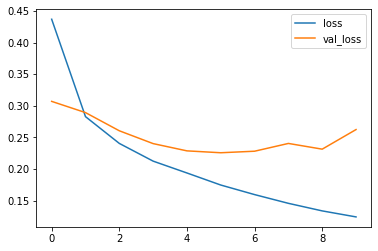

In [ ]:
hist=r.history

plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()

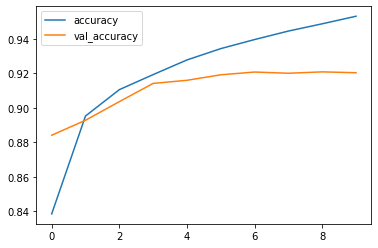

In [ ]:
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[898   0  18  17   1   1  62   0   3   0]
 [  4 984   2   7   1   0   1   0   1   0]
 [ 11   1 919   5  33   0  31   0   0   0]
 [ 15   1  12 933  23   0  16   0   0   0]
 [  0   0  75  19 870   1  35   0   0   0]
 [  0   0   0   0   0 989   0  11   0   0]
 [116   0  69  25  77   0 709   0   4   0]
 [  0   0   0   0   0   5   0 988   0   7]
 [  3   0   0   1   3   4   0   1 988   0]
 [  0   0   0   0   0  11   0  63   0 926]]


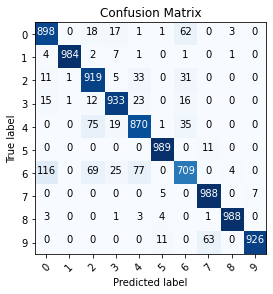

In [ ]:
#confussion matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):


  if normalize:
    cm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)


  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar
  tick_marks= np.arange(len(classes))

  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt ='.2f' if normalize else 'd'

  thresh = cm.max()/2


  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),
               horizontalalignment='center',
               color='white' if cm[i,j]>thresh else 'black')
      
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  plt.show()


p_test=model.predict(x_test).argmax(axis=1)
cm= confusion_matrix(y_test, p_test)

plot_confusion_matrix(cm,list(range(10)))

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

Text(0.5, 1.0, 'True label : Pullover Predicted : Shirt')

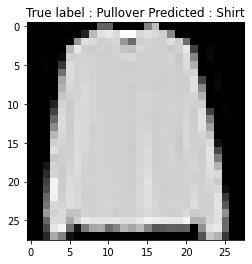

In [ ]:
#show misclassified examples

misclassified_idx= np.where(p_test!=y_test)[0]
i= np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('True label : %s Predicted : %s' % (labels[y_test[i]],labels[p_test[i]]))